In [47]:
import pandas as pd
import numpy as np
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import math

The dataset from dataprep is bquxjob nba.csv, which has been cleaned and prepared for processing.

In [48]:
df = pd.read_csv("bquxjob_nba.csv")

In [49]:
df.head()

,Player,Rank,Age,G,GS,MP,FG,FGA,FGPer,_3P,...,TOV,PF,PTS,Efficiency,Position,Team,Height,Weight,College,Salary
0,Kemba Walker,555,31,37,37,25.6,4.0,10.0,0.403,2.0,...,1.3,1.0,11.6,11.4,PG,New York Knicks,"6' 0""",184,Connecticut,36016200.0
1,Tyus Jones,295,25,67,18,20.6,3.3,7.2,0.454,1.0,...,0.6,0.5,8.3,11.2,PG,Memphis Grizzlies,"6' 0""",196,Duke,8376286.0
2,Kyle Lowry,336,35,56,56,34.2,4.3,10.0,0.428,2.2,...,2.8,2.8,13.1,17.9,PG,Miami Heat,"6' 0""",196,Villanova,26894128.0
3,Chris Paul,433,36,59,59,33.0,5.6,11.5,0.489,1.0,...,2.4,2.0,15.0,23.5,PG,Phoenix Suns,"6' 0""",175,Wake Forest,30000000.0
4,Trey Burke,84,29,38,0,10.9,2.1,5.3,0.399,0.7,...,0.7,1.0,5.4,3.8,PG,Dallas Mavericks,"6' 0""",185,Michigan,3150000.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      498 non-null    object 
 1   Rank        498 non-null    int64  
 2   Age         498 non-null    int64  
 3   G           498 non-null    int64  
 4   GS          498 non-null    int64  
 5   MP          498 non-null    float64
 6   FG          498 non-null    float64
 7   FGA         498 non-null    float64
 8   FGPer       498 non-null    float64
 9   _3P         498 non-null    float64
 10  _3PA        498 non-null    float64
 11  _3PPer      498 non-null    float64
 12  _2P         498 non-null    float64
 13  _2PA        498 non-null    float64
 14  _2PPer      498 non-null    float64
 15  eFGPer      498 non-null    float64
 16  FT          498 non-null    float64
 17  FTA         498 non-null    float64
 18  FTPer       498 non-null    float64
 19  TRB         498 non-null    f

In [51]:
df.describe()

,Rank,Age,G,GS,MP,FG,FGA,FGPer,_3P,_3PA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Efficiency,Weight,Salary
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02
mean,283.082329,26.259036,42.945783,21.337349,21.396787,3.529116,7.741165,0.451892,1.086546,3.090763,...,3.862651,2.161245,0.674498,0.427108,1.158032,1.739558,9.601807,10.923695,215.678715,8.427957e+06
std,169.533243,4.276082,21.032864,23.830443,9.061166,2.245966,4.796886,0.105549,0.900882,2.360625,...,2.202324,1.971059,0.405808,0.372128,0.828653,0.740236,6.276854,6.426188,23.307178,9.405823e+06
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,160.000000,9.252580e+05
25%,139.000000,23.000000,26.000000,1.000000,15.300000,1.900000,4.300000,0.404000,0.300000,1.100000,...,2.300000,0.800000,0.400000,0.200000,0.600000,1.200000,5.300000,6.325000,200.000000,1.782621e+06
50%,266.500000,26.000000,48.000000,11.000000,21.600000,3.000000,6.600000,0.448500,0.900000,2.700000,...,3.450000,1.500000,0.600000,0.300000,1.000000,1.800000,8.200000,9.800000,215.000000,4.479000e+06
75%,424.250000,29.000000,61.000000,40.000000,29.075000,4.800000,10.500000,0.500000,1.700000,4.800000,...,4.900000,2.875000,0.900000,0.600000,1.500000,2.300000,13.075000,14.500000,232.000000,1.069091e+07
max,597.000000,41.000000,74.000000,74.000000,38.200000,11.400000,21.700000,1.000000,4.500000,11.700000,...,14.500000,10.700000,2.000000,2.800000,4.800000,3.700000,30.000000,34.800000,282.000000,4.578097e+07


In [52]:
print("The number of unique names of Players are "+str(len(set(df.Player))))

The number of unique names of Players are 388


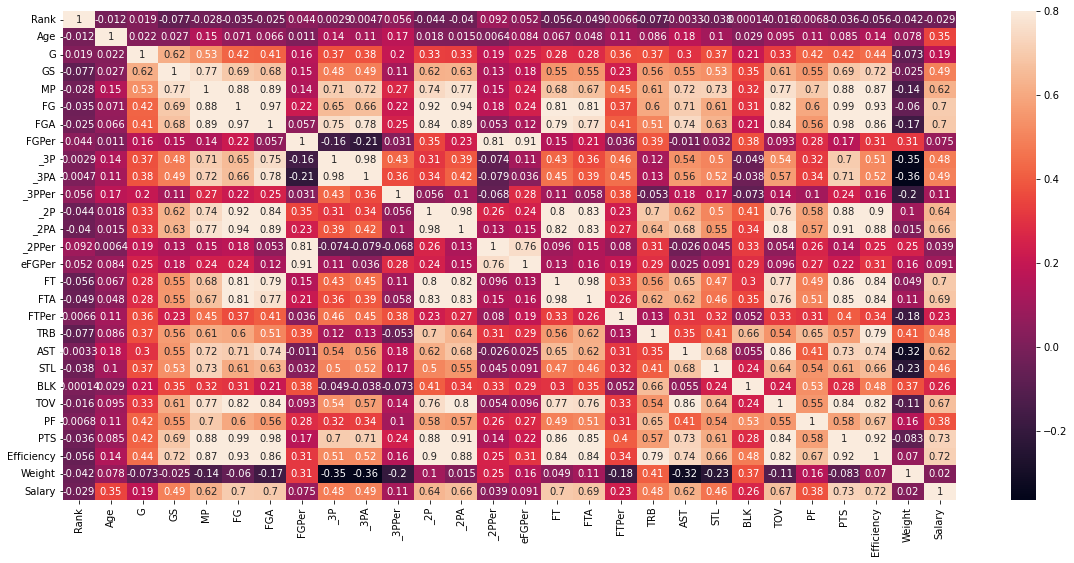

In [53]:
corrmat = df.corr()
plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [54]:
df1 = df.drop(columns=['Rank','Player','PTS'])

In [55]:
model = RandomForestRegressor(random_state=1, max_depth=10)
df1=pd.get_dummies(df1)
model.fit(df1,df.PTS)

RandomForestRegressor(max_depth=10, random_state=1)

In [56]:
df1.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGPer', '_3P', '_3PA', '_3PPer',
       ...
       'College_Wake Forest', 'College_Washington', 'College_Washington State',
       'College_Weber State', 'College_West Virginia',
       'College_Western Texas Coll. (J.C.)', 'College_Wichita State',
       'College_Wisconsin', 'College_Wyoming', 'College_Xavier'],
      dtype='object', length=191)

In [57]:
model.feature_importances_

array([2.97855216e-04, 4.20789949e-04, 2.12952217e-04, 9.24527739e-04,
       8.84901874e-01, 9.62693521e-02, 4.03230358e-04, 1.45229649e-03,
       9.99668181e-04, 3.72319425e-04, 3.79404865e-04, 3.63032450e-04,
       4.48160171e-04, 4.01252200e-04, 3.63625563e-03, 1.67661222e-03,
       9.80470051e-04, 3.10244002e-04, 3.15127592e-04, 1.84429739e-04,
       4.30112721e-04, 2.80868581e-04, 1.76772407e-04, 2.63313890e-03,
       2.09816067e-04, 5.38076075e-04, 9.19105176e-06, 2.54979984e-06,
       8.20254778e-09, 3.23478163e-05, 2.98983026e-05, 2.59769459e-05,
       6.81584408e-05, 9.03603359e-06, 5.18651613e-06, 8.67998553e-06,
       4.25512968e-05, 9.44397496e-07, 6.48579478e-06, 9.22792524e-07,
       3.20837392e-06, 3.70846057e-06, 3.16228901e-06, 5.35210850e-06,
       7.08273090e-06, 5.83560490e-06, 6.39821409e-07, 3.02390357e-06,
       2.22729230e-06, 9.44052756e-06, 7.21386895e-07, 5.34028753e-06,
       8.24773218e-06, 4.37474541e-06, 2.43742644e-06, 3.12295067e-06,
      

#### 1. What variables affect a player’s performance/value to the team? 

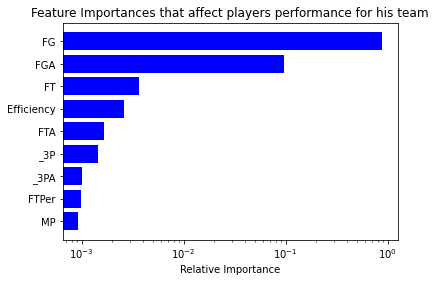

In [59]:
features = df1.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances that affect players performance for his team')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xscale('log')
plt.yticks(range(len(indices)), [features[i] for i in indices] )
plt.xlabel('Relative Importance')
plt.show()

#### 2. What is the age distribution of the top five performing teams?

(array([ 69.,  87., 113.,  79.,  85.,  37.,  24.,   3.,   1.]),
 array([19.        , 21.44444444, 23.88888889, 26.33333333, 28.77777778,
        31.22222222, 33.66666667, 36.11111111, 38.55555556, 41.        ]),
 <BarContainer object of 9 artists>)

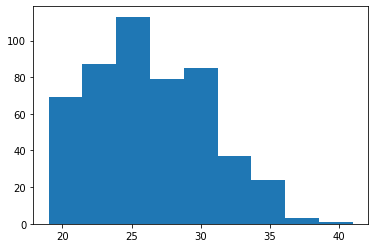

In [60]:

plt.hist(df['Age'], bins=9)

#### 3. The MP column has the average minutes played by the players per game.

In [73]:

df2 = df.drop(df[df.GS == 0].index)
df2[['Player','MP']].head(10)

,Player,MP
0,Kemba Walker,25.6
1,Tyus Jones,20.6
2,Kyle Lowry,34.2
3,Chris Paul,33.0
5,Ish Smith,16.4
7,Ish Smith,13.8
8,Aaron Holiday,16.2
9,Aaron Holiday,16.4
11,Tre Jones,15.3
13,Terry Rozier,34.0


#### 4. Field goal % of top 10 players

In [35]:
df1['FG%'][:10]

0    0.437
1    0.550
2    0.547
3    0.370
4    0.554
5    0.372
6    0.375
7    0.324
8    0.443
9    0.677
Name: FG%, dtype: float64

#### 5. Finding future NBA superstars 

In [63]:

players_C = df[df.Position == "C"]
players_PG = df[df.Position == "PG"]
players_SG = df[df.Position == "SG"]
players_PF = df[df.Position == "PF"]
players_SF = df[df.Position == "SF"]

players_PG.head(10)

,Player,Rank,Age,G,GS,MP,FG,FGA,FGPer,_3P,...,TOV,PF,PTS,Efficiency,Position,Team,Height,Weight,College,Salary
0,Kemba Walker,555,31,37,37,25.6,4.0,10.0,0.403,2.0,...,1.3,1.0,11.6,11.4,PG,New York Knicks,"6' 0""",184,Connecticut,36016200.0
1,Tyus Jones,295,25,67,18,20.6,3.3,7.2,0.454,1.0,...,0.6,0.5,8.3,11.2,PG,Memphis Grizzlies,"6' 0""",196,Duke,8376286.0
2,Kyle Lowry,336,35,56,56,34.2,4.3,10.0,0.428,2.2,...,2.8,2.8,13.1,17.9,PG,Miami Heat,"6' 0""",196,Villanova,26894128.0
3,Chris Paul,433,36,59,59,33.0,5.6,11.5,0.489,1.0,...,2.4,2.0,15.0,23.5,PG,Phoenix Suns,"6' 0""",175,Wake Forest,30000000.0
5,Ish Smith,504,33,55,1,16.4,2.6,6.2,0.422,0.4,...,1.1,1.2,5.9,7.5,PG,Charlotte Hornets,"6' 0""",175,Wake Forest,4500000.0
7,Ish Smith,504,33,37,1,13.8,2.0,5.0,0.395,0.3,...,1.0,0.9,4.5,5.2,PG,Charlotte Hornets,"6' 0""",175,Wake Forest,4500000.0
8,Aaron Holiday,241,25,41,14,16.2,2.4,5.2,0.467,0.6,...,1.0,1.5,6.1,6.4,PG,Washington Wizards,"6' 0""",185,UCLA,3980551.0
9,Aaron Holiday,241,25,58,14,16.4,2.5,5.3,0.468,0.6,...,1.1,1.4,6.4,7.6,PG,Washington Wizards,"6' 0""",185,UCLA,3980551.0
11,Tre Jones,294,22,60,6,15.3,2.1,4.4,0.479,0.1,...,0.7,1.0,5.2,8.0,PG,San Antonio Spurs,"6' 1""",185,Duke,1517981.0
14,T.J. McConnell,358,29,24,6,24.2,3.8,7.5,0.503,0.3,...,1.2,1.8,8.4,12.9,PG,Indiana Pacers,"6' 1""",190,Arizona,7500000.0


In [66]:

Cs = pd.DataFrame(players_C.Player[(players_C.Age<=23)&(players_C.PTS>=10)&(players_C.Efficiency>=12)]).rename(columns={"Player": "Centers"}).reset_index(drop=True)
PGs = pd.DataFrame(players_PG.Player[(players_PG.Age<=23)&(players_PG.PTS>=10)&(players_PG.Efficiency>=12)]).rename(columns={"Player": "Point Guards"}).reset_index(drop=True)
SGs = pd.DataFrame(players_SG.Player[(players_SG.Age<=23)&(players_SG.PTS>=10)&(players_SG.Efficiency>=12)]).rename(columns={"Player": "Shooting Guards"}).reset_index(drop=True)
PFs = pd.DataFrame(players_PF.Player[(players_PF.Age<=23)&(players_PF.PTS>=10)&(players_PF.Efficiency>=12)]).rename(columns={"Player": "Power Forwards"}).reset_index(drop=True)
SFs = pd.DataFrame(players_SF.Player[(players_SF.Age<=23)&(players_SF.PTS>=10)&(players_SF.Efficiency>=12)]).rename(columns={"Player": "Small Forwards"}).reset_index(drop=True)

future = pd.concat([Cs, PGs, SGs, PFs, SFs], axis=1, join="outer")
future

,Centers,Point Guards,Shooting Guards,Power Forwards,Small Forwards
0,Evan Mobley,Trae Young,Anfernee Simons,P.J. Washington,Luguentz Dort
1,Mo Bamba,Darius Garland,Malik Monk,Darius Bazley,Anthony Edwards
2,Wendell Carter Jr.,Cole Anthony,Kevin Porter Jr.,Jalen Smith,Keldon Johnson
3,Deandre Ayton,Tyrese Maxey,Jordan Poole,Jaren Jackson Jr.,Miles Bridges
4,Jarrett Allen,Ja Morant,Devin Vassell,Marvin Bagley III,Saddiq Bey
5,NaN,Coby White,Desmond Bane,Marvin Bagley III,Jayson Tatum
6,NaN,Tyler Herro,Hamidou Diallo,NaN,Franz Wagner
7,NaN,Tyrese Haliburton,Gary Trent Jr.,NaN,Scottie Barnes
8,NaN,Tyrese Haliburton,Jalen Green,NaN,NaN
9,NaN,Tyrese Haliburton,Shai Gilgeous-Alexander,NaN,NaN
